In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\ads.csv
data\equipements.csv
data\neighborhood_facilities.csv
data\transports.csv


In [3]:
#pd.read_csv ('/kaggle/input/real-estate-paris/transports.csv')
#pd.read_csv ('/kaggle/input/real-estate-paris/equipements.csv')
#pd.read_csv ('/kaggle/input/real-estate-paris/neighborhood_facilities.csv')

In [4]:
df = pd.read_csv ('data/ads.csv')
df

,id,description,adress,date_pub,date_update,price,fee
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l..."
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l..."
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l..."
...,...,...,...,...,...,...,...
1870,ad_741,Appartement familial - Nation. Le Groupe H&amp...,Achat appartement 6 pièces 168 m²Paris 12e 750...,Publiée il y a plus de 2 mois,Modifiée le 29 déc. 2021,1 697 000 €,"Honoraires : 1,62% TTC inclus à la charge de l..."
1871,ad_1600,"Village de Passy - 5 pièces - 195,51 m². Villa...",Achat appartement 5 pièces 200 m²Paris 16e 750...,Publiée le 14 déc. 2021,NaN,2 370 000 €,"Honoraires : 3,04% TTC inclus à la charge de l..."
1872,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,Publiée le 16 déc. 2021,NaN,441 000 €,Honoraires à la charge du vendeur
1873,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,Publiée il y a plus de 2 mois,Modifiée le 18 déc. 2021,785 000 €,"Honoraires : 4,67% TTC inclus à la charge de l..."


In [5]:
df_trans = pd.read_csv ('data/transports.csv')

In [6]:
df_trans = df_trans.groupby(['ad_id','type']).size().unstack(level=1)

In [7]:
df_trans.fillna(0, inplace=True)

In [8]:
df = pd.merge(df, df_trans, right_index=True, left_on='id')

In [9]:
nf = pd.read_csv ('data/neighborhood_facilities.csv')

In [10]:
nf = nf.groupby(['ad_id','name'])['number'].size().unstack(level=1)

In [11]:
nf.fillna(0, inplace=True)

In [12]:
df = pd.merge(df, nf, right_index=True, left_on='id')

In [13]:
drop_low_corr = ["Autolib'",
 'Bar',
 'Boucherie',
 'Boulangerie',
 'Bureau de poste',
 'Cinéma',
 'Collège',
 'Crèche',
 'Ecole maternelle',
 'Ecole primaire',
 'Enseignement supérieur',
 'Gare ferroviaire',
 'Hôpital',
 'Location de vélo',
 'Ludothèque',
 'Lycée',
 'Marché de quartier',
 'Médecin généraliste',
 'Pharmacie',
 'Restaurant',
 'Station service',
 'Supermarché et Hypermarché',
 'Supérette',
 'Terrain et Salle de sport',
 'Théâtre',
 "Vélib'",
 'Banque',
 'Monument historique',
 'Parking',
 'Presse et Tabac',
 'Salle de musculation / cardiotraining',
 'Station de taxi',
 'Médecin spécialiste', 
 'Parc, Jardin et Square',
]

In [14]:
df

,id,description,adress,date_pub,date_update,price,fee,bus,metro,Autolib',...,Presse et Tabac,Restaurant,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib'
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur,6.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l...",7.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur,5.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l...",7.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l...",12.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,ad_412,Paris 11e - SAINT-SÉBASTIEN / FROISSART - Appa...,Achat appartement 2 pièces 49 m²Paris 11e 7501...,Publiée il y a plus de 2 mois,Modifiée le 6 déc. 2021,520 000 €,Honoraires à la charge du vendeur,7.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1869,ad_767,Loft d'architecte dans une ancienne ferronneri...,Achat appartement 2 pièces 80 m²Paris 11e 7501...,Publiée il y a plus de 2 mois,Modifiée le 30 déc. 2021,850 000 €,Honoraires à la charge du vendeur,7.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1872,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,Publiée le 16 déc. 2021,NaN,441 000 €,Honoraires à la charge du vendeur,6.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1873,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,Publiée il y a plus de 2 mois,Modifiée le 18 déc. 2021,785 000 €,"Honoraires : 4,67% TTC inclus à la charge de l...",4.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [15]:
#df.drop(df[drop_low_corr], axis=1, inplace=True, errors='ignore')

In [16]:
df_equi = pd.read_csv ('data/equipements.csv')
df_equi

,ad_id,value
0,ad_1917,"62,54 m²"
1,ad_1917,2 pièces
2,ad_1917,1 chambre
3,ad_1917,Chauffage : Individuel Gaz
4,ad_1917,1 cave
...,...,...
20509,ad_534,1 pièce
20510,ad_534,1 chambre
20511,ad_534,Chauffage : électricité
20512,ad_534,1 salle d’eau


In [17]:
df_parking = df_equi.copy()

In [18]:
parking = df_parking[df_equi["value"].str.contains('parking')]

In [19]:
df_parking['parking'] = parking["value"].str.extract('(\d{1})', expand=False).str.strip().astype(int)

In [20]:
df_parking.drop(['value'], axis=1, inplace=True, errors='ignore')

In [21]:
df = pd.merge(df, df_parking, right_on='ad_id', left_on='id', how='left')

In [22]:
df.drop(['ad_id'], axis=1, inplace=True, errors='ignore')

In [23]:
df_parking

,ad_id,parking
0,ad_1917,NaN
1,ad_1917,NaN
2,ad_1917,NaN
3,ad_1917,NaN
4,ad_1917,NaN
...,...,...
20509,ad_534,NaN
20510,ad_534,NaN
20511,ad_534,NaN
20512,ad_534,NaN


In [24]:
df_equi = df_equi[df_equi["value"].str.contains('Construit')]

In [25]:
df_equi['built'] = df_equi["value"].str.extract('(\d{4})', expand=False).str.strip().astype(int)

C:\Users\Prasanth\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_equi.drop(['value'], axis=1, inplace=True, errors='ignore')

c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df = pd.merge(df, df_equi, right_on='ad_id', left_on='id', how='left')

In [28]:
df["built"].describe()

count    7976.000000
mean     1923.660105
std        51.768675
min      1634.000000
25%      1900.000000
50%      1930.000000
75%      1969.000000
max      2007.000000
Name: built, dtype: float64

In [29]:
df["built"] = df["built"].fillna(method = 'pad')

In [30]:
df["parking"].describe()

count    141.000000
mean       1.056738
std        0.232165
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: parking, dtype: float64

In [31]:
df["parking"] = df["parking"].fillna(0)

In [32]:
df.columns

Index(['id', 'description', 'adress', 'date_pub', 'date_update', 'price',
       'fee', 'bus', 'metro', 'Autolib'', 'Banque', 'Bar', 'Boucherie',
       'Boulangerie', 'Bureau de poste', 'Cinéma', 'Collège', 'Crèche',
       'Ecole maternelle', 'Ecole primaire', 'Enseignement supérieur',
       'Gare ferroviaire', 'Hôpital', 'Location de vélo', 'Ludothèque',
       'Lycée', 'Marché de quartier', 'Monument historique',
       'Médecin généraliste', 'Médecin spécialiste', 'Parc, Jardin et Square',
       'Parking', 'Pharmacie', 'Presse et Tabac', 'Restaurant',
       'Salle de musculation / cardiotraining', 'Station de taxi',
       'Station service', 'Supermarché et Hypermarché', 'Supérette',
       'Terrain et Salle de sport', 'Théâtre', 'Vélib'', 'parking', 'ad_id',
       'built'],
      dtype='object')

In [33]:
df.drop(['date_pub', 'date_update', 'fee', 'metro', 'ad_id'], axis=1, inplace=True, errors='ignore')

**Dataset containe duplicate rows with unique id**

In [34]:
df.describe()

,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,Collège,Crèche,...,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built
count,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,...,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.0,15128.000000,15128.000000
mean,7.720849,0.995637,0.987308,0.992266,0.940111,0.994646,0.921470,0.310352,0.893641,0.986515,...,0.262097,0.606095,0.428014,0.996034,0.969064,0.987507,0.581240,1.0,0.009849,1922.579588
std,3.360102,0.065909,0.111944,0.087605,0.237289,0.072979,0.269012,0.462653,0.308307,0.115343,...,0.439790,0.488630,0.494807,0.062854,0.173150,0.111077,0.493372,0.0,0.103974,51.326780
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1634.000000
25%,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,1900.000000
50%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1929.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1967.000000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.000000,2007.000000


**Finding and removing duplicate rows by adress because we can take address as id for each house**

In [35]:
pd.concat(g for _, g in df.groupby("adress") if len(g) > 1)

,id,description,adress,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,...,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built
6004,ad_1231,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1967.0
6005,ad_1231,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1967.0
6006,ad_1231,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1967.0
6007,ad_1231,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1967.0
6008,ad_1231,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10977,ad_1608,PARIS 2EME - MONTORGUEIL Studio cour arborée/p...,Achat studio 33 m²Paris 2e 75002 (Montorgueil ...,456 000 €,9.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1990.0
10978,ad_1608,PARIS 2EME - MONTORGUEIL Studio cour arborée/p...,Achat studio 33 m²Paris 2e 75002 (Montorgueil ...,456 000 €,9.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1990.0
10979,ad_1608,PARIS 2EME - MONTORGUEIL Studio cour arborée/p...,Achat studio 33 m²Paris 2e 75002 (Montorgueil ...,456 000 €,9.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1990.0
10980,ad_1608,PARIS 2EME - MONTORGUEIL Studio cour arborée/p...,Achat studio 33 m²Paris 2e 75002 (Montorgueil ...,456 000 €,9.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1990.0


**removing duplicate rows by adress**

In [36]:
df = df.drop_duplicates(subset=['adress'],  keep = 'last')

In [37]:
df

,id,description,adress,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,...,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built
1196,ad_965,Appartement 3 pièces à Paris (75018). LT Immob...,Achat appartement 3 pièces 62 m²Paris 18e 7501...,599 000 €,7.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1976.0
2444,ad_1427,ISSY LES MOULINEAUX APPARTEMENT 3 / 4 pièce(s)...,Achat appartement 3 pièces 78 m²Paris 15e 7501...,650 000 €,11.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1850.0
2560,ad_869,Quartier Losserand / montparnasse : 2 pièces c...,Achat appartement 2 pièces 23 m²Paris 14e 7501...,250 000 €,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1950.0
2787,ad_420,Appartement - 31m² - Paris 18ème. EXCLUSIVITÉ&...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,295 000 €,9.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1930.0
2873,ad_1593,BEAU 3 PIECES AU COEUR DU QUARTIER CONVENTION....,Achat appartement 3 pièces 60 m²Paris 15e 7501...,695 000 €,11.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15094,ad_412,Paris 11e - SAINT-SÉBASTIEN / FROISSART - Appa...,Achat appartement 2 pièces 49 m²Paris 11e 7501...,520 000 €,7.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1880.0
15102,ad_767,Loft d'architecte dans une ancienne ferronneri...,Achat appartement 2 pièces 80 m²Paris 11e 7501...,850 000 €,7.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1880.0
15110,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,441 000 €,6.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1880.0
15121,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,785 000 €,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1880.0


still we can find description column

In [38]:
df.describe()

,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,Collège,Crèche,...,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,...,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.0,433.0,433.000000
mean,7.556582,0.995381,0.986143,0.990762,0.935335,0.993072,0.921478,0.325635,0.896074,0.981524,...,0.237875,0.600462,0.415704,0.995381,0.967667,0.983834,0.593533,1.0,0.0,1919.055427
std,3.348183,0.067884,0.117032,0.095780,0.246219,0.083044,0.269302,0.469154,0.305518,0.134820,...,0.426275,0.490370,0.493413,0.067884,0.177086,0.126261,0.491742,0.0,0.0,52.934548
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1634.000000
25%,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.0,1892.000000
50%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1929.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1967.000000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,2007.000000


In [39]:
pd.concat(g for _, g in df.groupby("description") if len(g) > 1)

,id,description,adress,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,...,Salle de musculation / cardiotraining,Station de taxi,Station service,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built
5306,ad_193,Appartement - 3 pièces - 40 m² - Paris 75018. ...,Achat appartement 3 pièces 40 m²Paris 18e 7501...,330 000 €,7.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1963.0
10836,ad_197,Appartement - 3 pièces - 40 m² - Paris 75018. ...,Achat appartement 2 pièces 40 m²Paris 18e 7501...,330 000 €,7.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1860.0
13962,ad_1625,PARIS 20 - 3 PIECES - 57m² - METRO TELEGRAPHE....,Achat appartement 3 pièces 56 m²Paris 20e 7502...,465 000 €,11.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1929.0
14440,ad_1617,PARIS 20 - 3 PIECES - 57m² - METRO TELEGRAPHE....,Achat appartement 3 pièces 56 m²Paris 19e 7501...,465 000 €,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1928.0


In [40]:
list(df.loc[df['id'] == "ad_193"]["adress"])

['Achat appartement 3\xa0pièces 40\xa0m²Paris 18e\xa075018 (La Chapelle - Marx Dormoy)']

In [41]:
df['district'] = df['adress'].str.extract('(\d+)e', expand=False).str.strip()

In [42]:
df['volume'] = df['adress'].str.extract('(\d+).?m²', expand=False).str.strip()

In [43]:
df['rooms'] = df['adress'].str.extract('(\d+).?[p|P][i|I]', expand=False).str.strip()

In [44]:
df.loc[df['description'].str.contains('(?i)STUDIO') & df['rooms'].isna(), 'rooms'] = 1

In [45]:
df['price'] = df['price'].str.replace(u'\xa0', '').str.replace('€', '').astype(int)

In [46]:
df[df['district'].isna() | df['volume'].isna() | df['rooms'].isna()]

,id,description,adress,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,...,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built,district,volume,rooms
13042,ad_2104,3 PIECES - TERRASSE DE 16M2 - NOUVEAU CHAPELLE...,Achat appartement 3 piècesParis 18e 75018 (Por...,500000,12.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1892.0,18,NaN,3
13171,ad_1845,Appartement Paris 3 pièce(s) - 58 m2 - Rue Vit...,Achat appartement 3 pièces 59 m²PARIS 75020 (P...,560000,7.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1851.0,NaN,59,3


In [47]:
df.loc[1606, 'volume'] = 61
df.loc[1606, 'district'] = 18

In [48]:
df[df['district'].isna() | df['volume'].isna() | df['rooms'].isna()]

,id,description,adress,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,...,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built,district,volume,rooms
13042,ad_2104,3 PIECES - TERRASSE DE 16M2 - NOUVEAU CHAPELLE...,Achat appartement 3 piècesParis 18e 75018 (Por...,500000.0,12.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1892.0,18,NaN,3
13171,ad_1845,Appartement Paris 3 pièce(s) - 58 m2 - Rue Vit...,Achat appartement 3 pièces 59 m²PARIS 75020 (P...,560000.0,7.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1851.0,NaN,59,3
1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,61,NaN


In [49]:
#list(df.loc[df['id'] == "ad_2104"]["adress"])

In [50]:
df[["price", "district", "volume", "rooms"]] = df[["price", "district", "volume", "rooms"]].apply(pd.to_numeric)

In [51]:
df.drop(['description', 'adress'], axis=1, inplace=True, errors='ignore')

In [52]:
df = df.dropna()

In [53]:
df

,id,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,...,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built,district,volume,rooms
1196,ad_965,599000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1976.0,18.0,62.0,3.0
2444,ad_1427,650000.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1850.0,15.0,78.0,3.0
2560,ad_869,250000.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1950.0,14.0,23.0,2.0
2787,ad_420,295000.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1930.0,18.0,31.0,2.0
2873,ad_1593,695000.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1933.0,15.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15094,ad_412,520000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1880.0,11.0,49.0,2.0
15102,ad_767,850000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1880.0,11.0,80.0,2.0
15110,ad_1441,441000.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1880.0,13.0,46.0,2.0
15121,ad_380,785000.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1880.0,14.0,53.0,3.0


In [54]:
df.shape

(431, 42)

In [55]:
#df["rooms"].plot()

In [56]:
#df["price"].plot()

In [57]:
#df["volume"].plot()

In [58]:
#df["rooms"].plot()

<AxesSubplot:>

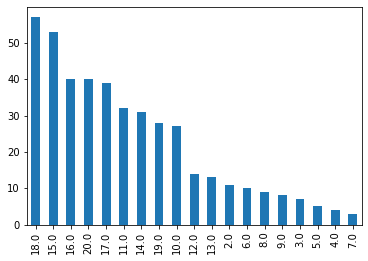

In [59]:
pd.value_counts(df['district']).plot.bar()

In [60]:
dist_group = df.groupby(['district']).mean()

<AxesSubplot:xlabel='district'>

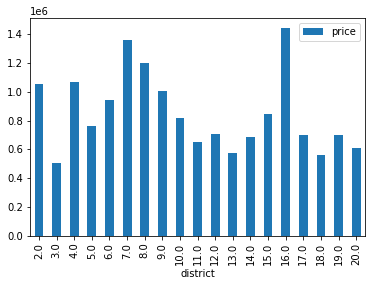

In [61]:
dist_group.plot.bar(y=["price"])

In [62]:
df

,id,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,...,Supermarché et Hypermarché,Supérette,Terrain et Salle de sport,Théâtre,Vélib',parking,built,district,volume,rooms
1196,ad_965,599000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1976.0,18.0,62.0,3.0
2444,ad_1427,650000.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1850.0,15.0,78.0,3.0
2560,ad_869,250000.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1950.0,14.0,23.0,2.0
2787,ad_420,295000.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1930.0,18.0,31.0,2.0
2873,ad_1593,695000.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1933.0,15.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15094,ad_412,520000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1880.0,11.0,49.0,2.0
15102,ad_767,850000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1880.0,11.0,80.0,2.0
15110,ad_1441,441000.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1880.0,13.0,46.0,2.0
15121,ad_380,785000.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1880.0,14.0,53.0,3.0


In [63]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C0C4322950> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), annot=True)

In [64]:
corr_matrix = df.corr()

In [65]:
corr = np.array((corr_matrix["price"].index, corr_matrix["price"].values)).T

In [66]:
[column for column, values in corr if values > 0.2]

['price', 'volume', 'rooms']

In [67]:
df_district = pd.get_dummies(df['district'])
df_district

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2444,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2560,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2873,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15094,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15102,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15110,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15121,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [68]:
df.drop(['district'], axis=1, inplace=True, errors='ignore')

c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
df = pd.concat([df, df_district], axis=1)

In [70]:
df.drop(['id'], axis=1, inplace=True, errors='ignore')

In [71]:
df2 = df.copy()

In [72]:
X = df.loc[:, df.columns != 'price']
y = df[["price"]]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
X_train

,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,Collège,Crèche,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
9872,10.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3706,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
10533,6.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
14455,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
13648,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
13861,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
14029,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4046,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
lm = LinearRegression()

In [76]:
lm.fit(X_train, y_train)

c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [77]:
coeff = pd.DataFrame(lm.coef_[0], X.columns, columns=["coefficient"])

In [78]:
coeff

,coefficient
bus,1.382567e+03
Autolib',-3.014595e+05
Banque,-1.442999e+05
Bar,-9.506743e+04
Boucherie,7.488579e+04
Boulangerie,2.940267e+05
Bureau de poste,-1.152788e+05
Cinéma,1.183909e+05
Collège,5.129853e+03
Crèche,2.925869e+05


In [79]:
predictions = lm.predict(X_test)

c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


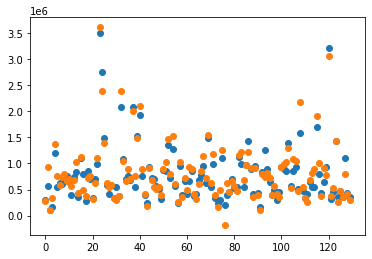

In [80]:
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_test)
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), predictions)

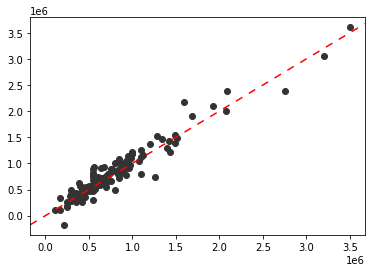

In [81]:
f, ax = plt.subplots()
ax.scatter(y_test, predictions, c='.2')
plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))

plt.show()

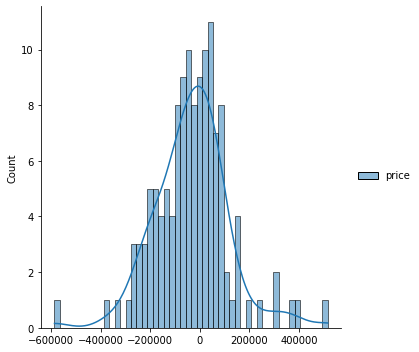

In [82]:
sns.displot((y_test - predictions), bins=50, kde=True)

#### ads + transport
- MAE: 114062.3789486279
- MSE: 25851574112.690586
- RMSE: 160784.2470912203
#### ads + transport + neigborhood
- MAE: 139396.04972876492
- MSE: 79283272794.68459
- RMSE: 281572.85521634464

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 111136.59427515471
MSE: 23130173973.616676
RMSE: 152086.07422646123


91.28236469624333 %
91.53622967609475 %
mean = 92.04055529588196 %
method_pad = 92.31300238877805 %

In [84]:
r2_score = lm.score(X_test.values,y_test.values)
print(r2_score*100,'%')

91.89386305982764 %


In [85]:
df2

,price,bus,Autolib',Banque,Bar,Boucherie,Boulangerie,Bureau de poste,Cinéma,Collège,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1196,599000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2444,650000.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2560,250000.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
2787,295000.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2873,695000.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15094,520000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
15102,850000.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
15110,441000.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
15121,785000.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = df2.loc[:, df2.columns != 'price']
y = df2[["price"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
import xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
classifier = xgboost.XGBRegressor()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
random_search.best_estimator_

In [ ]:
classifier = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=7, missing=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_test)
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_pred)

In [ ]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred, c='.2')
plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))

plt.show()

In [ ]:
sns.displot((y_test - y_pred.reshape(y_pred.shape[0], 1)), bins=50, kde=True)

In [ ]:
r2_score = classifier.score(X_test.values,y_test.values)
print(r2_score*100,'%')

In [ ]:
import pickle

In [ ]:
filename = 'linear_regression_model.pickle'
#pickle.dump(lm, open(filename, 'wb'))

In [ ]:
#lm.predict([X_test[:].iloc[1].values])

In [ ]:
#X_test[:].iloc[0].values.shape

In [ ]:
#y_test[:].iloc[1].values

In [ ]:
#test = pd.DataFrame(y_test)

In [ ]:
#test['pred'] = predictions.astype(int)

In [ ]:
#test